<a href="https://colab.research.google.com/github/AlexBugalter/Lesson/blob/main/Assessment_Tools/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%A4%D0%B5%D0%B9%D0%B3%D0%B5%D0%BD%D0%B1%D0%B0%D1%83%D0%BC%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# КОД

[*********************100%***********************]  1 of 1 completed


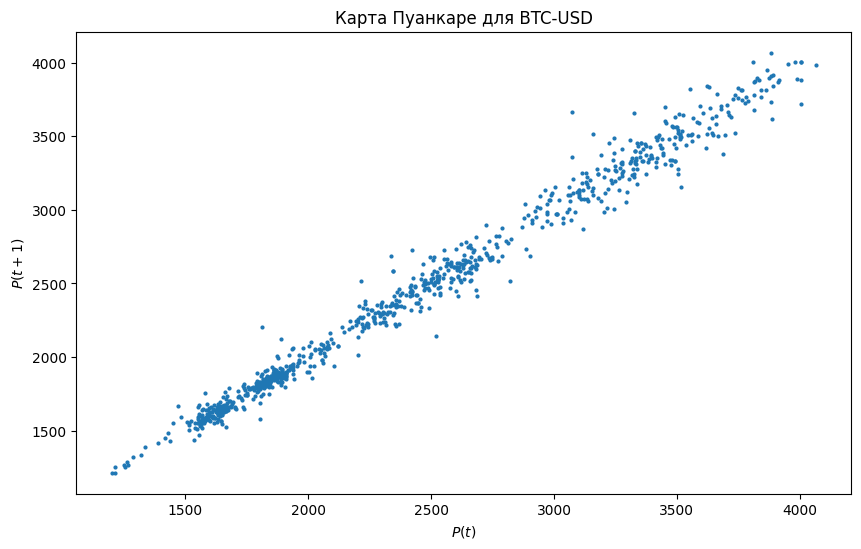

Константа Фейгенбаума: 1.1973


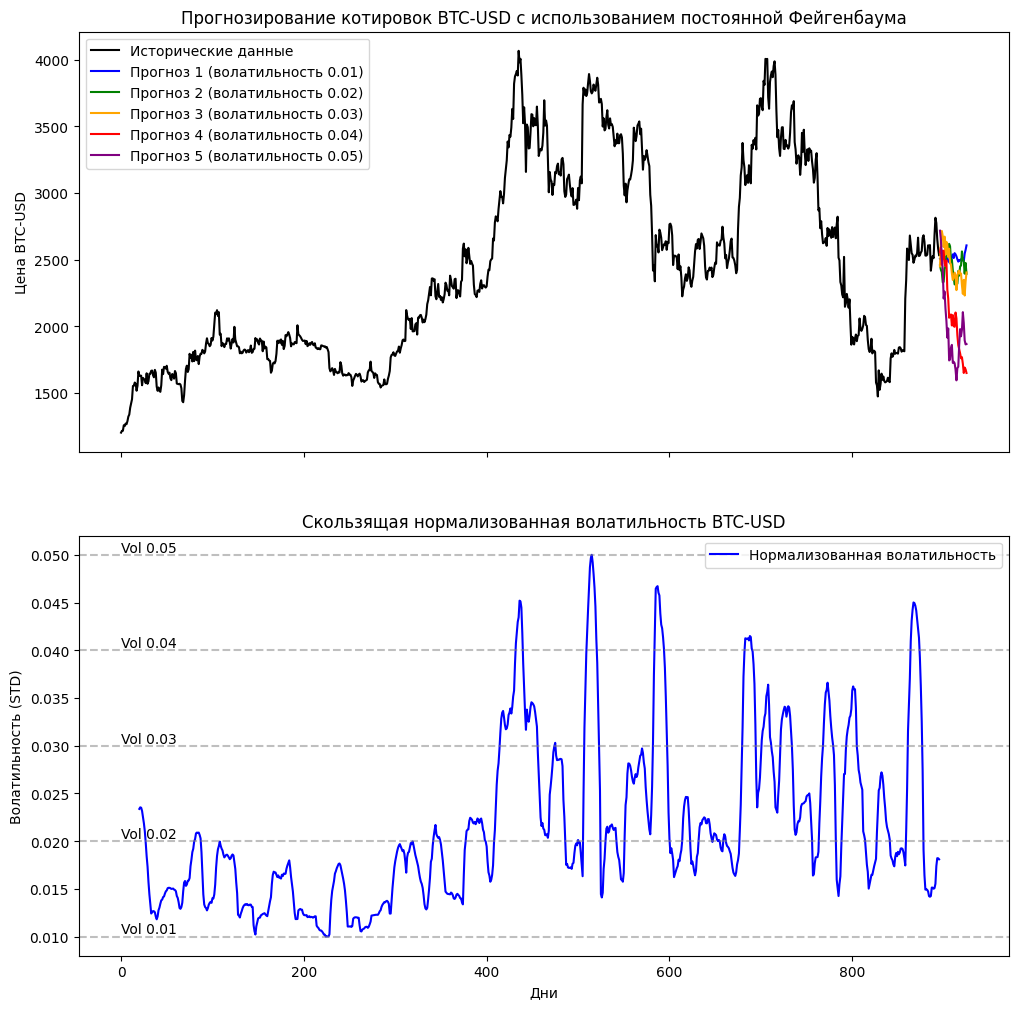

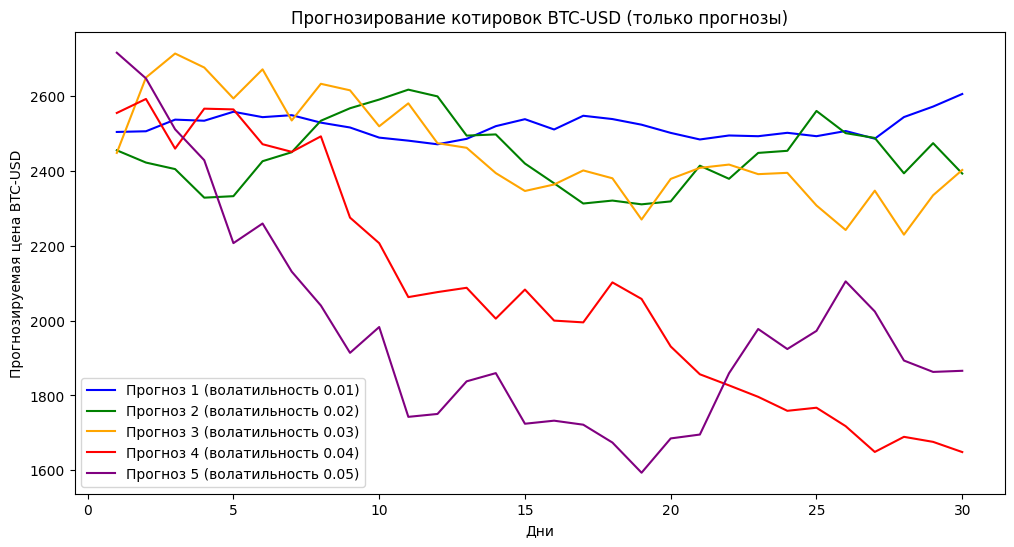

Длина 'День': 150
Длина 'Волатильность': 150
Длина 'Прогноз': 150
     День  Волатильность      Прогноз
0       1           0.01  2504.588047
30      1           0.02  2455.512266
60      1           0.03  2448.540720
90      1           0.04  2555.399718
120     1           0.05  2716.459474
..    ...            ...          ...
29     30           0.01  2606.119118
59     30           0.02  2393.354610
89     30           0.03  2402.972203
119    30           0.04  1648.584626
149    30           0.05  1865.907603

[150 rows x 3 columns]


In [8]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Загрузка исторических данных ETH-USDT
btc_data = yf.download('ETH-USD', start='2023-01-01', end='2025-06-15', interval='1d')

# Используем закрытые цены
prices = btc_data['Close'].values.flatten()

# Вычисление индикатора волатильности (скользящее стандартное отклонение)
window_size = 20  # Период окна для скользящей волатильности
volatility = np.array([np.std(prices[i:i+window_size]) for i in range(len(prices) - window_size)])
volatility = np.concatenate((np.full(window_size, np.nan), volatility))  # Заполнение начала массива NaN

# Нормализация волатильности к диапазону 0.01 - 0.05
vol_min, vol_max = 0.01, 0.05
volatility_normalized = (volatility - np.nanmin(volatility)) / (np.nanmax(volatility) - np.nanmin(volatility)) * (vol_max - vol_min) + vol_min

# Построение карты Пуанкаре
plt.figure(figsize=(10, 6))
plt.plot(prices[:-1], prices[1:], 'o', markersize=2)
plt.xlabel('$P(t)$')
plt.ylabel('$P(t+1)$')
plt.title('Карта Пуанкаре для BTC-USD')
plt.show()

# Выявление пиков для анализа бифуркаций
peaks, _ = find_peaks(prices, height=0)
intervals = np.diff(peaks)

# Вычисление отношения интервалов
ratios = intervals[:-1] / intervals[1:]
feigenbaum_constant = np.mean(ratios)

print(f"Константа Фейгенбаума: {feigenbaum_constant:.4f}")

# Функция для создания прогнозов с разной волатильностью
def generate_forecast(prices, steps, volatility):
    forecast = [prices[-1]]
    for _ in range(steps):
        future_value = forecast[-1] * (1 + np.random.normal(0, volatility))
        forecast.append(future_value)
    return forecast[1:]  # Возвращаем прогнозы без первого значения (начальной цены)

# Количество шагов для прогнозирования
forecast_steps = 30

# Создание 5 прогнозов с разной волатильностью
volatilities = [0.01, 0.02, 0.03, 0.04, 0.05]
forecasts = [generate_forecast(prices, forecast_steps, vol) for vol in volatilities]

# Построение графиков
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# График цен
axs[0].plot(range(len(prices)), prices, label='Исторические данные', color='black')
colors = ['blue', 'green', 'orange', 'red', 'purple']
labels = [f'Прогноз {i+1} (волатильность {vol})' for i, vol in enumerate(volatilities)]
for forecast, color, label in zip(forecasts, colors, labels):
    axs[0].plot(range(len(prices), len(prices) + len(forecast)), forecast, label=label, color=color)
axs[0].set_ylabel('Цена BTC-USD')
axs[0].set_title('Прогнозирование котировок BTC-USD с использованием постоянной Фейгенбаума')
axs[0].legend()

# Индикатор волатильности с горизонтальными метками
axs[1].plot(range(len(volatility_normalized)), volatility_normalized, label='Нормализованная волатильность', color='blue')
for vol in volatilities:
    axs[1].axhline(y=vol, linestyle='--', color='grey', alpha=0.5)
    axs[1].text(0, vol, f'Vol {vol:.2f}', color='black', verticalalignment='bottom')

axs[1].set_xlabel('Дни')
axs[1].set_ylabel('Волатильность (STD)')
axs[1].set_title('Скользящая нормализованная волатильность BTC-USD')
axs[1].legend()

plt.show()

# График только с прогнозами
plt.figure(figsize=(12, 6))
for forecast, color, label in zip(forecasts, colors, labels):
    plt.plot(range(1, forecast_steps + 1), forecast, label=label, color=color)
plt.xlabel('Дни')
plt.ylabel('Прогнозируемая цена BTC-USD')
plt.title('Прогнозирование котировок BTC-USD (только прогнозы)')
plt.legend()
plt.show()

# Создание DataFrame для прогнозов
forecast_days = np.arange(1, forecast_steps + 1)
forecast_data = {
    'День': np.tile(forecast_days, len(volatilities)),
    'Волатильность': np.repeat(volatilities, forecast_steps),
    'Прогноз': np.concatenate(forecasts)
}

# Проверка длины массивов
print("Длина 'День':", len(forecast_data['День']))
print("Длина 'Волатильность':", len(forecast_data['Волатильность']))
print("Длина 'Прогноз':", len(forecast_data['Прогноз']))

forecast_df = pd.DataFrame(forecast_data)

# Сортировка DataFrame по дням и волатильности
forecast_df_sorted = forecast_df.sort_values(by=['День', 'Волатильность'])

# Вывод таблицы предсказаний
print(forecast_df_sorted)
